# Day 1 Laboratory - Familiarise with Jupyter and Pandas

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataset and explore it

In general, search on the documentation online
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=csv#pandas.read_csv
or type `?<func_name>` for help in here. For example `?pd.read_csv`.

In [2]:
url = 'https://data.london.gov.uk/download/animal-rescue-incidents-attended-by-lfb/01007433-55c2-4b8a-b799-626d9e3bc284/Animal%20Rescue%20incidents%20attended%20by%20LFB%20from%20Jan%202009.csv' 
df = pd.read_csv(url)

In [3]:
df

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
0,139091,2009-01-01 03:01:00,2009,2008/09,Special Service,1.0,2.0,255.0,510.0,Redacted,...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091,2009-01-01 08:51:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091,2009-01-04 10:07:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091,2009-01-05 12:27:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,1.000215e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
4,3553091,2009-01-06 15:23:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,059997-30042023,2023-04-30 14:51:00,2023,2023/24,Special Service,1.0,1.0,NaN,NaN,CAT ON ROOF PROPERTY TWO FLOORS HIGH,...,NaN,SQUIRES LANE,20040420.0,N3,NaN,NaN,526150,190650,NaN,NaN
9447,060053-30042023,2023-04-30 16:32:00,2023,2023/24,Special Service,1.0,1.0,NaN,NaN,Redacted,...,1.009427e+10,SYDENHAM ROAD,22001951.0,SE26,536106.0,171445.0,536150,171450,51.425682,-0.043690
9448,060076-30042023,2023-04-30 17:27:00,2023,2023/24,Special Service,2.0,3.0,NaN,NaN,CAT IMPALED ON FENCE ADDITIONAL PUMP REQUIRE...,...,NaN,MANSFORD STREET,22700779.0,E2,NaN,NaN,534550,182750,NaN,NaN
9449,060234-30042023,2023-04-30 20:58:00,2023,2023/24,Special Service,1.0,1.0,NaN,NaN,CAT TRAPPED ON FOURTH FLOOR ROOF,...,NaN,SEVEN SISTERS ROAD,21603790.0,N4,NaN,NaN,531450,186750,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9451 entries, 0 to 9450
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IncidentNumber              9451 non-null   object 
 1   DateTimeOfCall              9451 non-null   object 
 2   CalYear                     9451 non-null   int64  
 3   FinYear                     9451 non-null   object 
 4   TypeOfIncident              9451 non-null   object 
 5   PumpCount                   9386 non-null   float64
 6   PumpHoursTotal              9385 non-null   float64
 7   HourlyNotionalCost(£)       9337 non-null   float64
 8   IncidentNotionalCost(£)     9272 non-null   float64
 9   FinalDescription            9446 non-null   object 
 10  AnimalGroupParent           9451 non-null   object 
 11  OriginofCall                9451 non-null   object 
 12  PropertyType                9451 non-null   object 
 13  PropertyCategory            9451 

## Data preparation

### Null values management

In [5]:
df.isna().sum()

IncidentNumber                   0
DateTimeOfCall                   0
CalYear                          0
FinYear                          0
TypeOfIncident                   0
PumpCount                       65
PumpHoursTotal                  66
HourlyNotionalCost(£)          114
IncidentNotionalCost(£)        179
FinalDescription                 5
AnimalGroupParent                0
OriginofCall                     0
PropertyType                     0
PropertyCategory                 0
SpecialServiceTypeCategory       0
SpecialServiceType               0
WardCode                        10
Ward                            10
BoroughCode                     12
Borough                         12
StnGroundName                    0
UPRN                          5957
Street                           0
USRN                          1156
PostcodeDistrict                 0
Easting_m                     4938
Northing_m                    4938
Easting_rounded                  0
Northing_rounded    

In [6]:
df[(df.PumpCount.isna()) & (df.PumpHoursTotal.isna())]

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
314,119148091,2009-07-05 09:25:00,2009,2009/10,Special Service,NaN,NaN,260.0,NaN,CAT TRAPPED UNDER FLOOR BOARDS,...,NaN,Regina Road,20501335.0,SE25,NaN,NaN,534250,168650,NaN,NaN
355,132513091,2009-07-25 11:17:00,2009,2009/10,Special Service,NaN,NaN,260.0,NaN,KITTEN TRAPPED IN GUTTERING ON ROOF,...,NaN,Sandrock Road,22000900.0,SE13,NaN,NaN,537450,176050,NaN,NaN
523,208663091,2009-11-17 16:16:00,2009,2009/10,Special Service,NaN,NaN,260.0,NaN,Redacted,...,NaN,Freezeland Way,NaN,UB10,507714.0,184730.0,507750,184750,51.551189,-0.447845
1268,43265111,2011-03-26 09:53:00,2011,2010/11,Special Service,NaN,NaN,260.0,NaN,DOG IN DISTRESS IN RIVER,...,NaN,Albert Embankment,NaN,SE1,530485.0,179007.0,530450,179050,51.494957,-0.121712
1394,76409111,2011-05-17 22:12:00,2011,2011/12,Special Service,NaN,NaN,260.0,NaN,RUNNING CALL TO ANMINAL TRAPPED IN FENCE,...,1.000234e+11,Faggs Road,21500428.0,TW14,510292.0,174713.0,510250,174750,51.460657,-0.413808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,141972-25082022,2022-08-25 10:34:00,2022,2022/23,Special Service,NaN,NaN,364.0,NaN,Redacted,...,NaN,BRONDESBURY ROAD,20202084.0,NW6,NaN,NaN,525150,183650,NaN,NaN
8882,150994-10092022,2022-09-10 15:20:00,2022,2022/23,Special Service,NaN,NaN,364.0,NaN,Redacted,...,1.000044e+10,THE QUEEN'S WALK,21902356.0,SE1,530509.0,179779.0,530550,179750,51.501894,-0.121075
8977,169036-13102022,2022-10-13 16:37:00,2022,2022/23,Special Service,NaN,NaN,364.0,NaN,DOG WITH HEAD STUCK IN RAILINGS,...,1.003356e+10,KENSINGTON ROAD,8400487.0,W8,526149.0,179670.0,526150,179650,51.501907,-0.183901
9054,186378-13112022,2022-11-13 00:09:00,2022,2022/23,Special Service,NaN,NaN,364.0,NaN,KITTEN STUCK UNDERNEATH FLOORBOARDS,...,NaN,JOHN HARRISON WAY,20801698.0,SE10,NaN,NaN,539950,179350,NaN,NaN


In [7]:
df[df['IncidentNotionalCost(£)'] == df['HourlyNotionalCost(£)'] * df.PumpHoursTotal]

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
0,139091,2009-01-01 03:01:00,2009,2008/09,Special Service,1.0,2.0,255.0,510.0,Redacted,...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091,2009-01-01 08:51:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091,2009-01-04 10:07:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091,2009-01-05 12:27:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,1.000215e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
4,3553091,2009-01-06 15:23:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,043885-29032023,2023-03-29 20:11:00,2023,2022/23,Special Service,1.0,1.0,364.0,364.0,KITTEN INJURED IN TREE,...,1.002377e+10,VICARAGE LANE,22302502.0,IG1,544929.0,187209.0,544950,187250,51.565143,0.089597
9333,044188-30032023,2023-03-30 12:55:00,2023,2022/23,Special Service,1.0,1.0,364.0,364.0,SMALL ANIMAL STUCK IN CHIMNEY,...,NaN,DEVONS ROAD,22700408.0,E3,NaN,NaN,537450,181950,NaN,NaN
9334,044237-30032023,2023-03-30 15:19:00,2023,2022/23,Special Service,1.0,1.0,364.0,364.0,BIRD TRAPPED IN NETTING ON THE SIDE OF THE BRI...,...,1.000111e+10,GREET STREET,21900640.0,SE1,531413.0,180091.0,531450,180050,51.504491,-0.107934
9335,044337-30032023,2023-03-30 18:53:00,2023,2022/23,Special Service,1.0,1.0,364.0,364.0,INJURED KITTEN LOCKED IN GATED AREA,...,NaN,WIGHTMAN ROAD,21106644.0,N4,NaN,NaN,531450,188350,NaN,NaN


In [8]:
df.dropna(subset=['PumpCount', 'PumpHoursTotal'])

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
0,139091,2009-01-01 03:01:00,2009,2008/09,Special Service,1.0,2.0,255.0,510.0,Redacted,...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091,2009-01-01 08:51:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091,2009-01-04 10:07:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091,2009-01-05 12:27:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,1.000215e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
4,3553091,2009-01-06 15:23:00,2009,2008/09,Special Service,1.0,1.0,255.0,255.0,Redacted,...,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,059997-30042023,2023-04-30 14:51:00,2023,2023/24,Special Service,1.0,1.0,NaN,NaN,CAT ON ROOF PROPERTY TWO FLOORS HIGH,...,NaN,SQUIRES LANE,20040420.0,N3,NaN,NaN,526150,190650,NaN,NaN
9447,060053-30042023,2023-04-30 16:32:00,2023,2023/24,Special Service,1.0,1.0,NaN,NaN,Redacted,...,1.009427e+10,SYDENHAM ROAD,22001951.0,SE26,536106.0,171445.0,536150,171450,51.425682,-0.043690
9448,060076-30042023,2023-04-30 17:27:00,2023,2023/24,Special Service,2.0,3.0,NaN,NaN,CAT IMPALED ON FENCE ADDITIONAL PUMP REQUIRE...,...,NaN,MANSFORD STREET,22700779.0,E2,NaN,NaN,534550,182750,NaN,NaN
9449,060234-30042023,2023-04-30 20:58:00,2023,2023/24,Special Service,1.0,1.0,NaN,NaN,CAT TRAPPED ON FOURTH FLOOR ROOF,...,NaN,SEVEN SISTERS ROAD,21603790.0,N4,NaN,NaN,531450,186750,NaN,NaN


[]

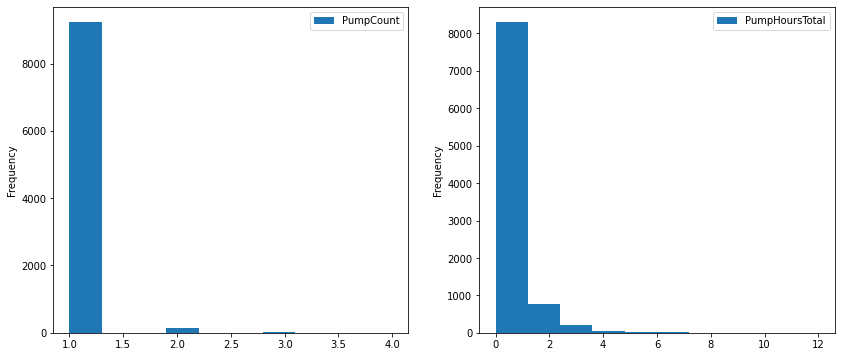

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
df.plot.hist(y='PumpCount', ax=axs[0])
df.plot.hist(y='PumpHoursTotal', ax=axs[1])
plt.plot()

In [12]:
df.fillna({'PumpCount': 1, 'PumpHoursTotal': 1}, inplace=True)

In [13]:
df['IncidentNotionalCost(£)'] = df['HourlyNotionalCost(£)'] * df.PumpHoursTotal

In [14]:
df.isna().sum()

IncidentNumber                   0
DateTimeOfCall                   0
CalYear                          0
FinYear                          0
TypeOfIncident                   0
PumpCount                        0
PumpHoursTotal                   0
HourlyNotionalCost(£)          114
IncidentNotionalCost(£)        114
FinalDescription                 5
AnimalGroupParent                0
OriginofCall                     0
PropertyType                     0
PropertyCategory                 0
SpecialServiceTypeCategory       0
SpecialServiceType               0
WardCode                        10
Ward                            10
BoroughCode                     12
Borough                         12
StnGroundName                    0
UPRN                          5957
Street                           0
USRN                          1156
PostcodeDistrict                 0
Easting_m                     4938
Northing_m                    4938
Easting_rounded                  0
Northing_rounded    

### Reduction and optimisation

In [15]:
df.nunique().sort_values()

TypeOfIncident                   1
SpecialServiceTypeCategory       4
PumpCount                        4
PropertyCategory                 7
OriginofCall                     8
PumpHoursTotal                  12
HourlyNotionalCost(£)           12
CalYear                         15
FinYear                         16
SpecialServiceType              24
AnimalGroupParent               28
BoroughCode                     37
Borough                         70
IncidentNotionalCost(£)         78
StnGroundName                  108
PropertyType                   186
PostcodeDistrict               276
Northing_rounded               425
Easting_rounded                530
WardCode                       758
Ward                          1222
UPRN                          3343
Northing_m                    4096
Easting_m                     4159
Longitude                     4444
Latitude                      4444
FinalDescription              5732
USRN                          6309
Street              

In [16]:
df.TypeOfIncident.unique()

array(['Special Service'], dtype=object)

In [17]:
df.drop(columns=['TypeOfIncident'], inplace=True)

In [18]:
df['AnimalGroupParent'].unique()

array(['Dog', 'Fox', 'Horse', 'Rabbit',
       'Unknown - Heavy Livestock Animal', 'Squirrel', 'Cat', 'Bird',
       'Unknown - Domestic Animal Or Pet', 'Sheep', 'Deer',
       'Unknown - Wild Animal', 'Snake', 'Lizard', 'Hedgehog', 'cat',
       'Hamster', 'Lamb', 'Fish', 'Bull', 'Cow', 'Ferret', 'Budgie',
       'Unknown - Animal rescue from water - Farm animal', 'Pigeon',
       'Goat', 'Tortoise',
       'Unknown - Animal rescue from below ground - Farm animal'],
      dtype=object)

In [19]:
df.loc[df['AnimalGroupParent'] == 'cat', 'AnimalGroupParent'] = 'Cat'

In [20]:
df.loc[df['AnimalGroupParent'] == 'Unknown - Domestic Animal Or Pet', 'AnimalGroupParent'] = 'Domestic'

### Type conversion

In [21]:
df.DateTimeOfCall

0       2009-01-01 03:01:00
1       2009-01-01 08:51:00
2       2009-01-04 10:07:00
3       2009-01-05 12:27:00
4       2009-01-06 15:23:00
               ...         
9446    2023-04-30 14:51:00
9447    2023-04-30 16:32:00
9448    2023-04-30 17:27:00
9449    2023-04-30 20:58:00
9450    2023-04-30 23:42:00
Name: DateTimeOfCall, Length: 9451, dtype: object

In [22]:
pd.to_datetime(df['DateTimeOfCall']).head()

0   2009-01-01 03:01:00
1   2009-01-01 08:51:00
2   2009-01-04 10:07:00
3   2009-01-05 12:27:00
4   2009-01-06 15:23:00
Name: DateTimeOfCall, dtype: datetime64[ns]

<AxesSubplot:>

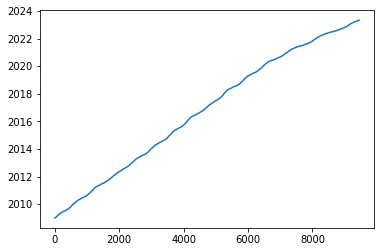

In [23]:
pd.to_datetime(df['DateTimeOfCall']).plot()

In [24]:
df['DateTimeOfCall'] = pd.to_datetime(df['DateTimeOfCall'])

In [25]:
df.set_index('DateTimeOfCall', inplace=True)

In [26]:
df

,IncidentNumber,CalYear,FinYear,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,AnimalGroupParent,OriginofCall,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
DateTimeOfCall,,,,,,,,,,,,,,,,,,,,,
2009-01-01 03:01:00,139091,2009,2008/09,1.0,2.0,255.0,510.0,Redacted,Dog,Person (land line),...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
2009-01-01 08:51:00,275091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Fox,Person (land line),...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2009-01-04 10:07:00,2075091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Dog,Person (mobile),...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
2009-01-05 12:27:00,2872091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Horse,Person (mobile),...,1.000215e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
2009-01-06 15:23:00,3553091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Rabbit,Person (mobile),...,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 14:51:00,059997-30042023,2023,2023/24,1.0,1.0,NaN,NaN,CAT ON ROOF PROPERTY TWO FLOORS HIGH,Cat,Person (mobile),...,NaN,SQUIRES LANE,20040420.0,N3,NaN,NaN,526150,190650,NaN,NaN
2023-04-30 16:32:00,060053-30042023,2023,2023/24,1.0,1.0,NaN,NaN,Redacted,Dog,Person (land line),...,1.009427e+10,SYDENHAM ROAD,22001951.0,SE26,536106.0,171445.0,536150,171450,51.425682,-0.043690
2023-04-30 17:27:00,060076-30042023,2023,2023/24,2.0,3.0,NaN,NaN,CAT IMPALED ON FENCE ADDITIONAL PUMP REQUIRE...,Cat,Person (mobile),...,NaN,MANSFORD STREET,22700779.0,E2,NaN,NaN,534550,182750,NaN,NaN


In [27]:
df.loc['2021-01-01':'2021-01-31', 'FinalDescription']

DateTimeOfCall
2021-01-01 12:09:00        KITTEN STUCK UP TREE  AL REQUESTED FROM SCENE
2021-01-01 14:06:00                                             Redacted
2021-01-03 18:40:00                CAT WITH LEG TRAPPED IN BATH PLUGHOLE
2021-01-04 13:39:00                                             Redacted
2021-01-06 10:22:00                                             Redacted
2021-01-06 13:09:00    CAT IN DISTRESS ON ROOF - ADDITIONAL APPLIANCE...
2021-01-06 20:35:00        DOG TRAPPED IN FOX HOLE  - MEET AT CLUB HOUSE
2021-01-07 23:50:00                   KITTEN STUCK BETWEEN WALL AND ROOF
2021-01-09 08:01:00                                  DOG STUCK IN TRENCH
2021-01-10 19:27:00                                             Redacted
2021-01-12 11:39:00                                             Redacted
2021-01-12 22:38:00                                 CAT TRAPPED IN DITCH
2021-01-16 18:05:00                          DOG TRAPPED IN PORTER CABIN
2021-01-17 16:09:00    DOG TRAPPED I

## Visualisation

<AxesSubplot:title={'center':'Monthly Calls'}, xlabel='DateTimeOfCall'>

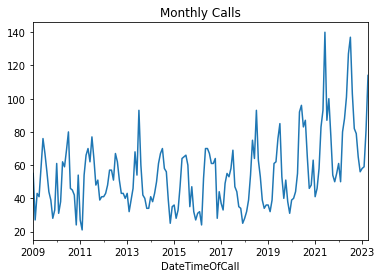

In [28]:
df.resample('M')['IncidentNumber'].count().plot(title='Monthly Calls')

In [29]:
df.resample('M')['IncidentNumber'].count().sort_values(ascending=False).head(20)

DateTimeOfCall
2021-06-30    140
2022-07-31    137
2022-06-30    127
2023-04-30    114
2022-08-31    103
2022-05-31    101
2021-08-31    100
2020-06-30     96
2021-05-31     93
2013-07-31     93
2018-07-31     93
2020-05-31     92
2022-04-30     88
2020-08-31     87
2021-07-31     87
2019-07-31     85
2021-04-30     83
2020-07-31     83
2022-09-30     82
2023-03-31     81
Name: IncidentNumber, dtype: int64

<AxesSubplot:title={'center':'Average hourly cost'}, xlabel='DateTimeOfCall'>

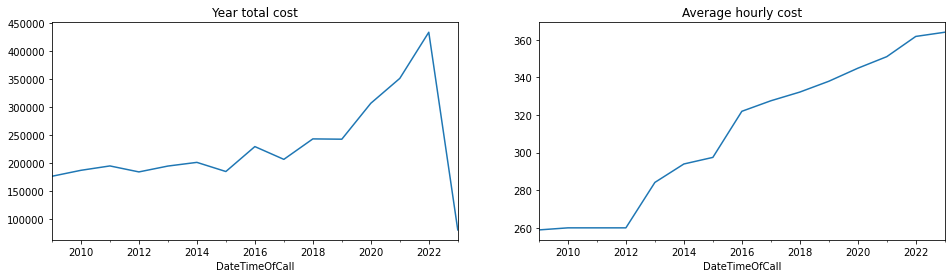

In [30]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)
df.resample('Y')['IncidentNotionalCost(£)'].sum().plot(
    title='Year total cost', ax=axs[0]
)
df.resample('Y')['HourlyNotionalCost(£)'].mean().plot(
    title='Average hourly cost', ax=axs[1]
)
# plt.show()

<AxesSubplot:ylabel='AnimalGroupParent'>

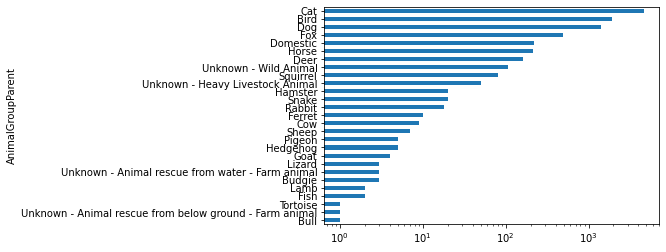

In [31]:
df.groupby('AnimalGroupParent')['IncidentNumber'].count().sort_values().plot.barh(logx=True)

<AxesSubplot:xlabel='DateTimeOfCall'>

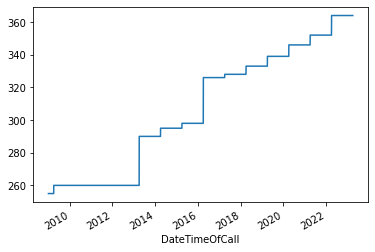

In [32]:
df['HourlyNotionalCost(£)'].plot.line()

In [33]:
df.groupby('StnGroundName')['IncidentNumber'].count()

StnGroundName
Acton          72
Addington      62
Barking        90
Barnet         90
Battersea      78
               ..
Whitechapel    25
Willesden      66
Wimbledon      75
Woodford       90
Woodside       82
Name: IncidentNumber, Length: 108, dtype: int64

### Install this for later `pip install geopandas contextily`

In [34]:
# drop missing longitude/latitude
df2 = df.dropna(subset=['Longitude', 'Latitude'])
# also drop zero values
df2 = df2[df2['Latitude'] != 0]
# convert to geodataframe using geopandas
import geopandas

# set crs to EPSG:4326 to specify WGS84 Latitude/Longitude
gdf = geopandas.GeoDataFrame(
    df2,
    geometry=geopandas.points_from_xy(df2['Longitude'], df2['Latitude']),
    crs='EPSG:4326',
)
gdf.head()

,IncidentNumber,CalYear,FinYear,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,AnimalGroupParent,OriginofCall,...,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,geometry
DateTimeOfCall,,,,,,,,,,,,,,,,,,,,,
2009-01-01 08:51:00,275091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Fox,Person (land line),...,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167,POINT (-0.06417 51.39095)
2009-01-04 10:07:00,2075091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Dog,Person (mobile),...,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985,POINT (-0.16199 51.36894)
2009-01-05 12:27:00,2872091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Horse,Person (mobile),...,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684,POINT (-0.48968 51.60528)
2009-01-07 06:29:00,4011091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Dog,Person (land line),...,Holloway Road,NaN,E11,539013.0,186162.0,539050,186150,51.557221,0.003880,POINT (0.00388 51.55722)
2009-01-07 11:55:00,4211091,2009,2008/09,1.0,1.0,255.0,255.0,Redacted,Dog,Person (mobile),...,Aldersbrook Road,NaN,E12,541327.0,186654.0,541350,186650,51.561067,0.037434,POINT (0.03743 51.56107)


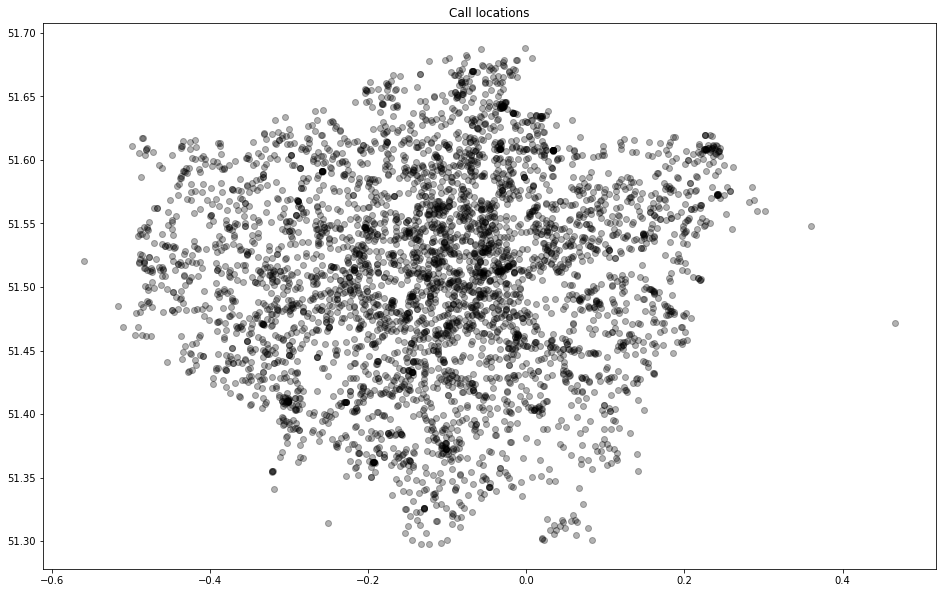

In [35]:
f, ax = plt.subplots(figsize=(16, 16))
# plot location of calls involving animals
gdf.plot(ax=ax, color='black', alpha=0.3)
plt.title('Call locations')
# plt.axis('off')
plt.show()

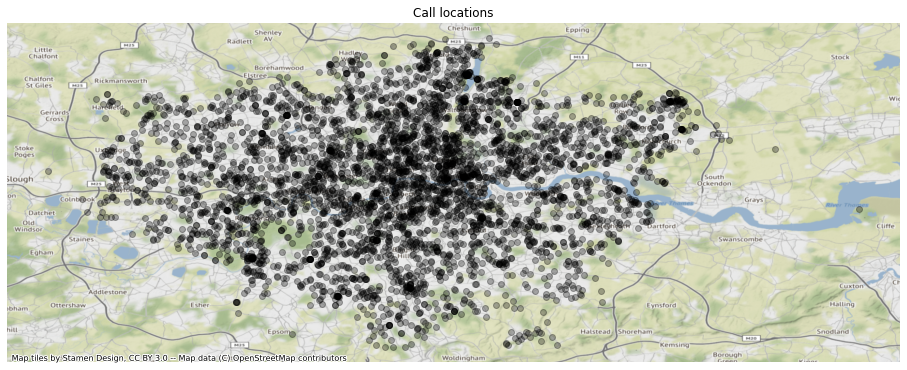

In [36]:
import contextily as cx

f, ax = plt.subplots(figsize=(16, 16))
# plot location of calls involving animals
gdf.plot(ax=ax, color='black', alpha=0.3)
# add a basemap of the region using contextily
cx.add_basemap(ax, crs=gdf.crs)
plt.title('Call locations')
plt.axis('off')
plt.show()

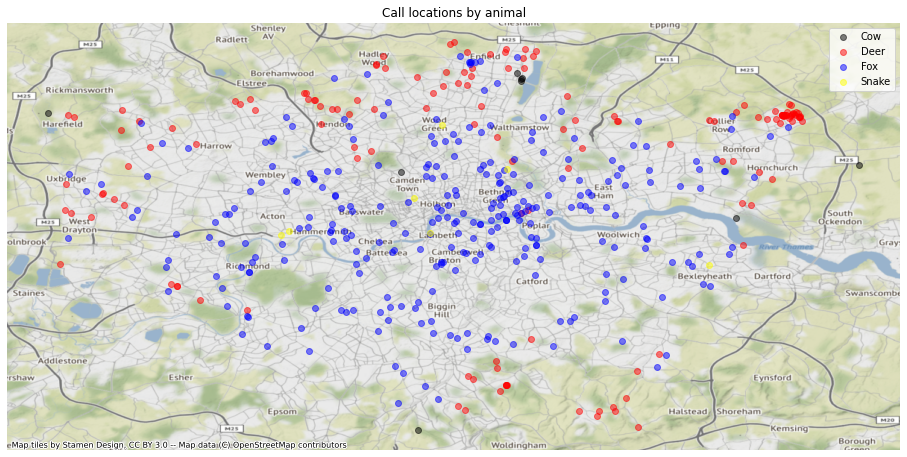

In [37]:
f, ax = plt.subplots(figsize=(16, 16))
# plot location of calls involving animals
for animal, colour in [
    ('Cow', 'black'),
    ('Deer', 'red'),
    ('Fox', 'blue'),
    ('Snake', 'yellow'),
    # ('Cat', 'teal'),
    # ('Dog', 'brown')
]:
    gdf[gdf['AnimalGroupParent'] == animal].plot(
        ax=ax, color=colour, alpha=0.5, label=animal
    )
# add a basemap of the region using contextily
cx.add_basemap(ax, crs=gdf.crs)
plt.title('Call locations by animal')
plt.legend()
plt.axis('off')
plt.show()